In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dat = pd.read_csv("googleplaystore_v2.csv", header= 0)
print(dat.head())
print(dat.shape)
print(dat.info())
print(dat.isnull().sum())
dat1 = dat[~(dat.Rating.isnull())] # or ~dat.Rating.isnull()
print(dat1.shape)

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art

In [3]:
print(dat1[dat1['Android Ver'].isnull()])
m = (dat1['Android Ver'].isnull()) & (dat1['Category'] == '1.9')
dat1 = dat1[~m]
print(dat1[dat1['Android Ver'].isnull()])
print(dat1['Android Ver'].mode()[0])
dat1['Android Ver'] = dat1['Android Ver'].fillna(dat1['Android Ver'].mode()[0])
print(dat1['Android Ver'].isnull().sum())
print(dat1.isnull().sum())

                                           App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN  
                         App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0  

In [4]:
print(dat1["Current Ver"].value_counts())
a = dat1["Current Ver"].mode()[0]
dat1['Current Ver'] = dat1['Current Ver'].fillna(a)
print(dat1.isnull().sum())
print(dat1.dtypes)

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [5]:
print(dat1.Price.value_counts())
dat1["Price"] = dat1.Price.apply(lambda x: 0 if x == '0' else float(x[1:]))
print(dat1.Price.value_counts())
print(dat1.Reviews.value_counts())
dat1.Reviews = dat1.Reviews.astype("int32")
print(dat1.Reviews.describe())

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64
0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64
count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64


In [6]:
print(dat1['Installs'].value_counts())
def mak(i):
        i = i.replace('+','')
        i = i.replace(',','')
        i = int(i)
        return i
dat1['Installs'] = dat1.Installs.apply(lambda x : mak(x))
print(dat1['Installs'].value_counts())

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64
1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64


count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64
                                 App   Category  Rating  Reviews  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249   
5917                        Ra Ga Ba       GAME     5.0        2   
6700                Brick Breaker BR       GAME     5.0        7   
7402            Trovami se ci riesci       GAME     5.0       11   
8591                         DN Blog     SOCIAL     5.0       20   
10697                        Mu.F.O.       GAME     5.0        2   

               Size  Installs  Type  Price Content Rating     Genres  \
2454   25000.000000         1  Free   0.00       Everyone    Medical   
4663   21516.529524     10000  Paid   2.49       Everyone  Lifestyle   
5917   20000.000000         1  Paid   1.49

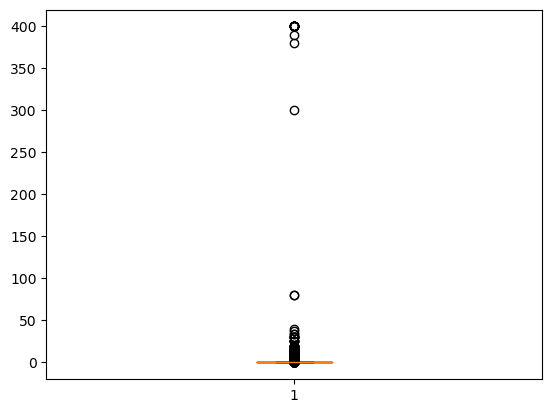

In [7]:
print(dat1["Rating"].describe())
print(dat1[dat1['Reviews'] > dat1['Installs']])
dat1 = dat1[ dat1['Reviews'] <= dat1['Installs']]
print(dat1[dat1['Reviews'] > dat1['Installs']])
print(dat1[ (dat1.Type == "Free") & (dat1.Price > 0)])
plt.boxplot(dat1["Price"])
plt.show()

                                 App   Category  Rating  Reviews     Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500.0   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000.0   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300.0   
5351                       I am rich  LIFESTYLE     3.8     3547   1800.0   
5354                  I am Rich Plus     FAMILY     4.0      856   8700.0   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600.0   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700.0   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900.0   
5358                      I am Rich!    FINANCE     3.8       93  22000.0   
5359              I am rich(premium)    FINANCE     3.5      472    965.0   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700.0   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700.0   

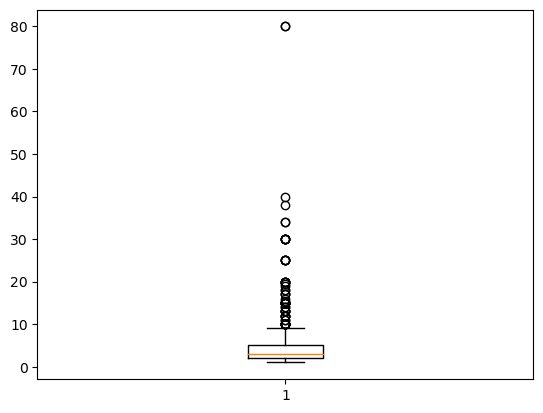

                            App   Category  Rating  Reviews     Size  \
2253  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2301    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2365  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2402    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2414               LTC AS Legal    MEDICAL     4.0        6   1300.0   
5360           I am Rich Person  LIFESTYLE     4.2      134   1800.0   

      Installs  Type  Price Content Rating     Genres     Last Updated  \
2253      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2301      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2365      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2402      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2414       100  Paid  39.99       Everyone    Medical    April 4, 2018   
5360      1000  Paid  37.99       Everyone  Lifesty

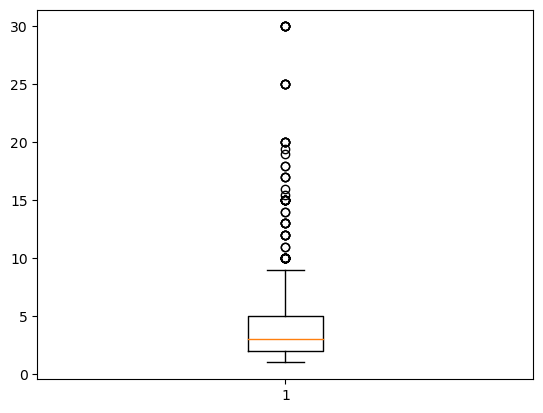

In [8]:
print(dat1[dat1['Price'] > 200])
dat1 = dat1[dat1['Price'] < 200]
plt.boxplot(dat1[dat1.Price > 0].Price)
plt.show()
print(dat1[dat1['Price'] > 30])
dat1 = dat1[dat1['Price'] <= 30]
plt.boxplot(dat1[dat1.Price > 0].Price)
plt.show()

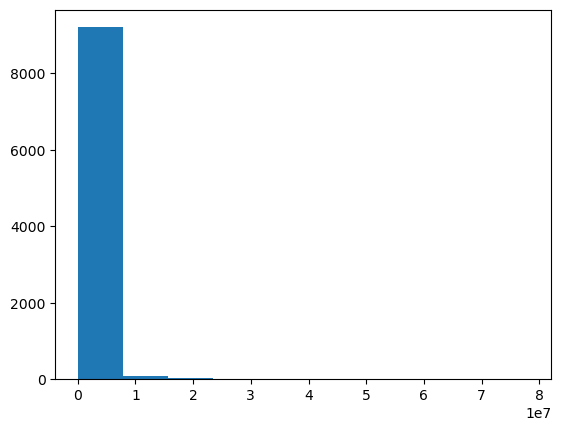

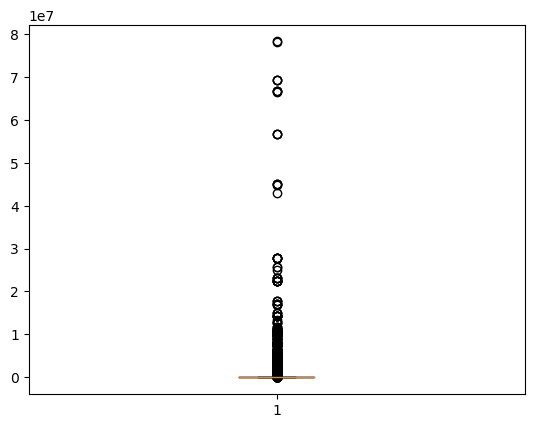

                                                    App       Category  \
335            Messenger – Text and Video Chat for Free  COMMUNICATION   
336                                  WhatsApp Messenger  COMMUNICATION   
342                                     Viber Messenger  COMMUNICATION   
378         UC Browser - Fast Download Private & Secure  COMMUNICATION   
381                                  WhatsApp Messenger  COMMUNICATION   
...                                                 ...            ...   
6449                        BBM - Free Calls & Messages  COMMUNICATION   
7536  Security Master - Antivirus, VPN, AppLock, Boo...          TOOLS   
7937                                     Shadow Fight 2           GAME   
8894  Cache Cleaner-DU Speed Booster (booster & clea...          TOOLS   
8896  DU Battery Saver - Battery Charger & Battery Life          TOOLS   

      Rating   Reviews          Size    Installs  Type  Price Content Rating  \
335      4.0  56642847  21516.5

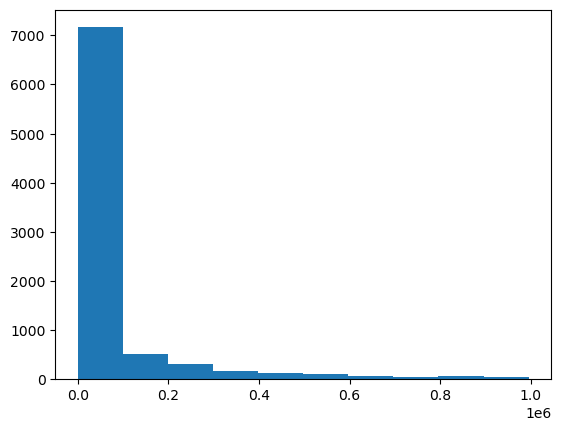

In [9]:
plt.hist(dat1.Reviews)
plt.show()
plt.boxplot(dat1.Reviews)
plt.show()
print(dat1[dat1['Reviews'] >= 10000000])
dat1 = dat1[dat1['Reviews'] <= 1000000]
print(dat1.shape)
plt.hist(dat1.Reviews)
plt.show()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64
(8624, 13)


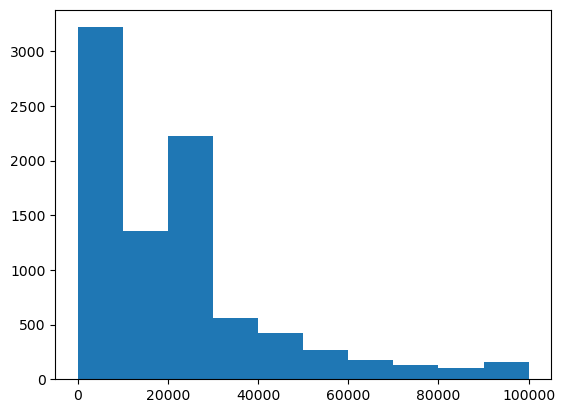

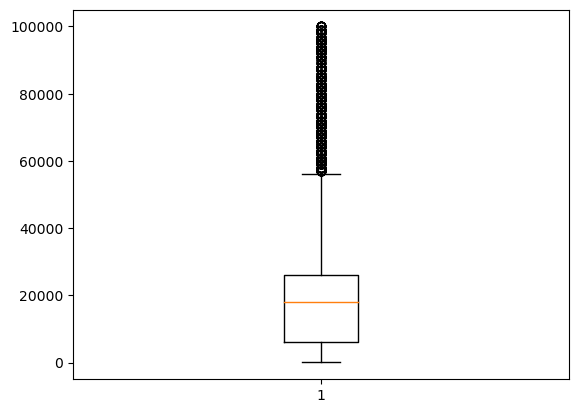

In [10]:
print(dat1.Installs.describe())
dat1 = dat1[dat1['Installs'] <= 100000000]
print(dat1.shape)
plt.hist(dat1['Size'])
plt.show()
plt.boxplot(dat1['Size'])
plt.show()

In [11]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

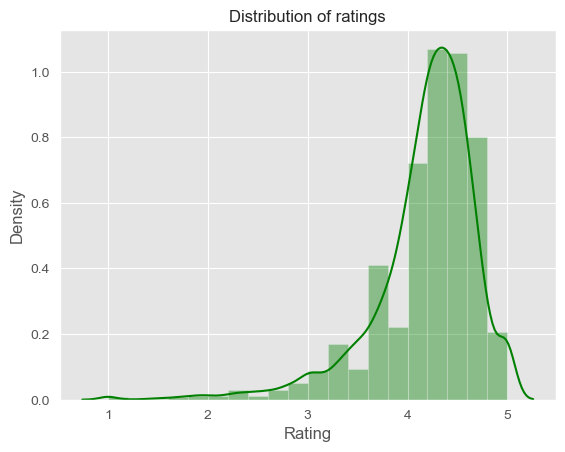

In [12]:
#styling the plots 
sns.set_style('dark')
plt.style.use('ggplot')
#plt.style.use('dark_background')
#plt.style.use('default')
sns.distplot(dat1.Rating, bins = 20, color= 'g')
plt.title('Distribution of ratings', fontsize = 12)
plt.show()

In [13]:
print(dat1['Content Rating'].value_counts())
dat1 = dat1[~dat1['Content Rating'].isin(['Adults only 18+', 'Unrated'])]
dat1.reset_index(inplace= True, drop= True)
print(dat1.info())

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8620 non-null   object 
 1   Category        8620 non-null   object 
 2   Rating          8620 non-null   float64
 3   Reviews         8620 non-null   int32  
 4   Size            8620 non-null   float64
 5   Installs        8620 non-null   int64  
 6   Type            8620 non-null   object 
 7   Price           8620 non-null   float64
 8   Content Rating  8620 non-null   object 
 9   Genres          8620 non-null   object 
 10  Last Updated    8620 non-null   object 
 11  Current Ver     8620 non-null   object 
 12  Android Ver     8620 non-null   object 
dtypes: float64(3), int32(1), int64(1),

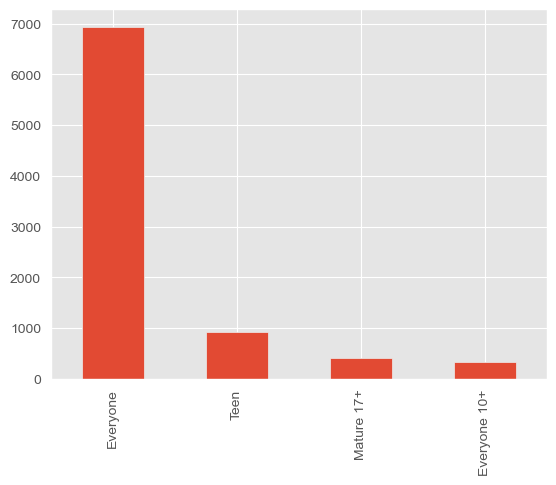

In [14]:
#dat1['Content Rating'].value_counts().plot.pie()
dat1['Content Rating'].value_counts().plot.bar() #also .barh is used for a horizontal bar chart
plt.show()

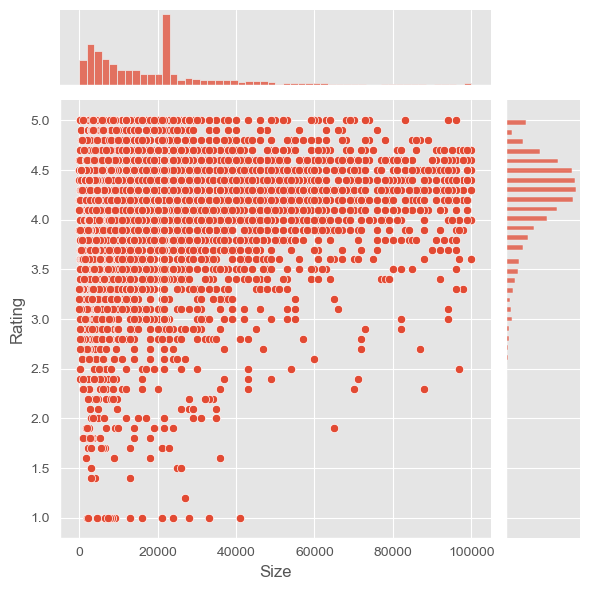

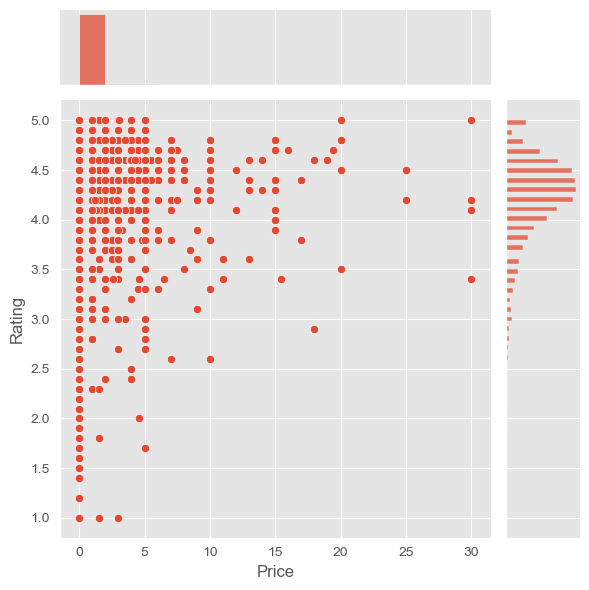

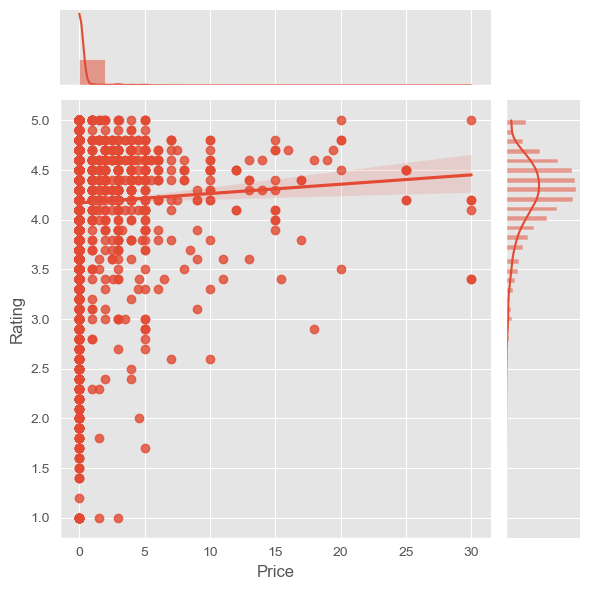

In [15]:
sns.jointplot(x= dat1.Size, y= dat1.Rating)
plt.show()
sns.jointplot(x= dat1.Price, y= dat1.Rating)
sns.jointplot(x= dat1.Price, y= dat1.Rating, kind= 'reg')
plt.show()

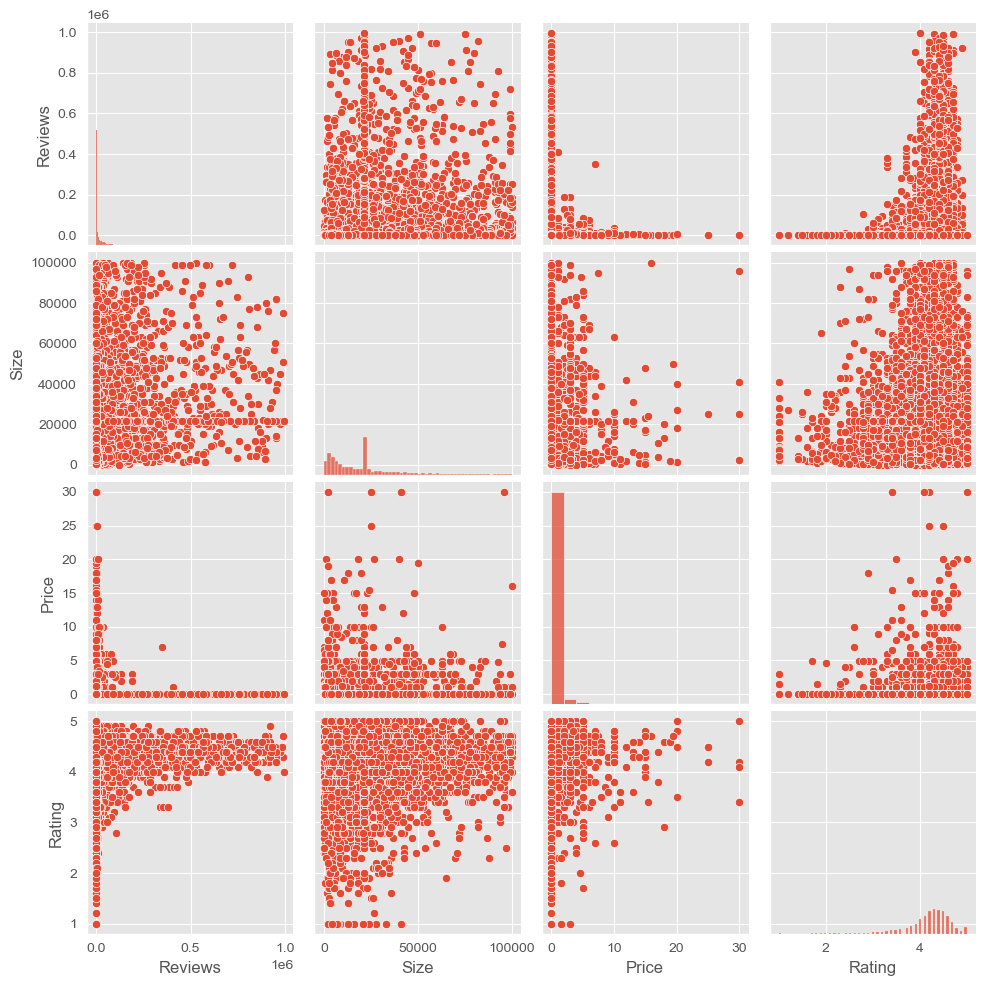

In [16]:
sns.pairplot(dat1[['Reviews', 'Size','Price','Rating']])
plt.show()

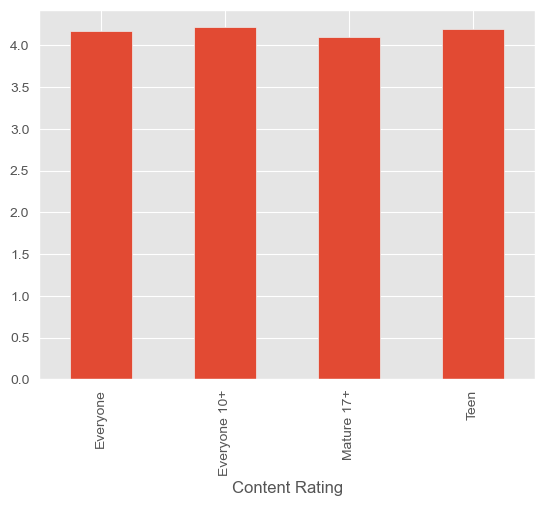

In [17]:
dat1.groupby(['Content Rating'])['Rating'].mean().plot.bar()
plt.show()

<AxesSubplot:xlabel='Content Rating'>

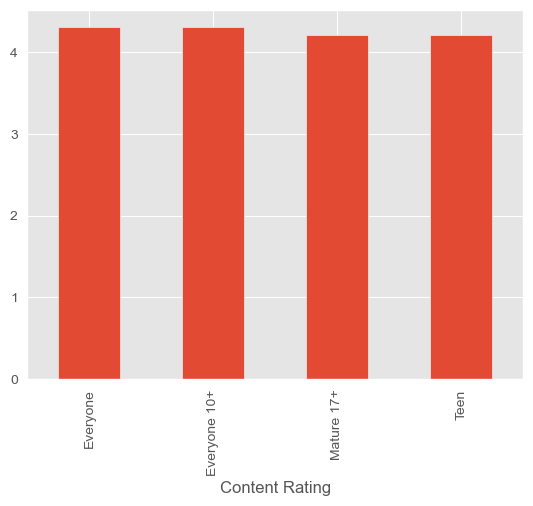

In [18]:
dat1.groupby(['Content Rating'])['Rating'].median().plot.bar()

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

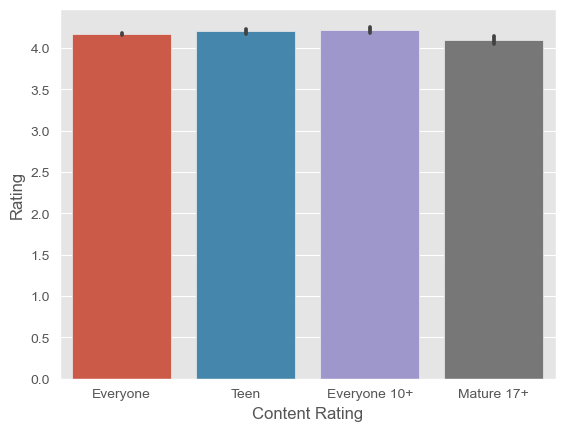

In [19]:
sns.barplot(data= dat1, x= 'Content Rating', y= 'Rating')

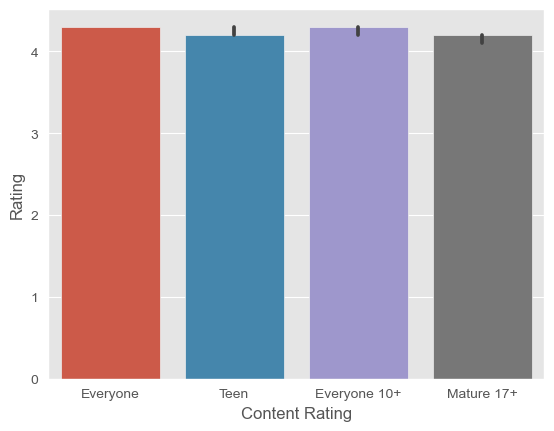

In [20]:
sns.barplot(data= dat1, x= 'Content Rating', y= 'Rating', estimator= np.median)
plt.show()

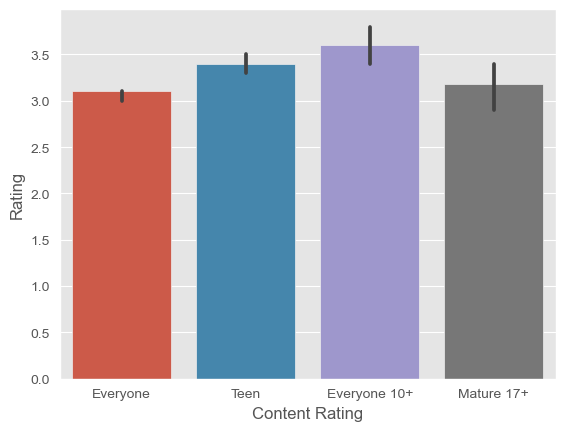

In [21]:
sns.barplot(data= dat1, x= 'Content Rating', y= 'Rating', estimator= lambda x: np.quantile(x, 0.05))
plt.show()

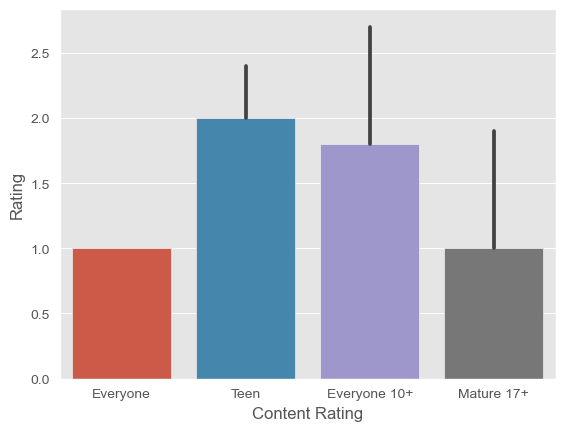

In [22]:
sns.barplot(data= dat1, x= 'Content Rating', y= 'Rating', estimator= np.min)
plt.show()

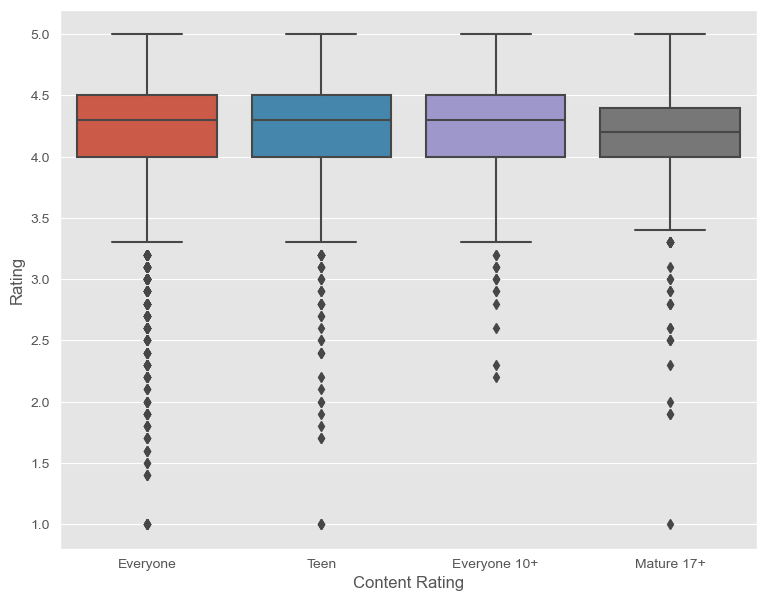

In [23]:
plt.figure(figsize= [9,7])
sns.boxplot(x= dat1['Content Rating'], y=dat["Rating"])
plt.show()

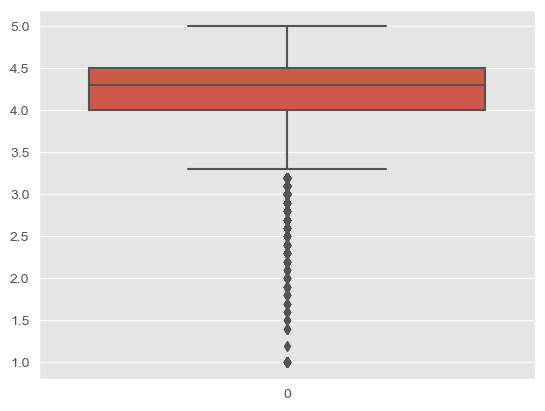

In [24]:
sns.boxplot(dat1['Rating'])
plt.show()

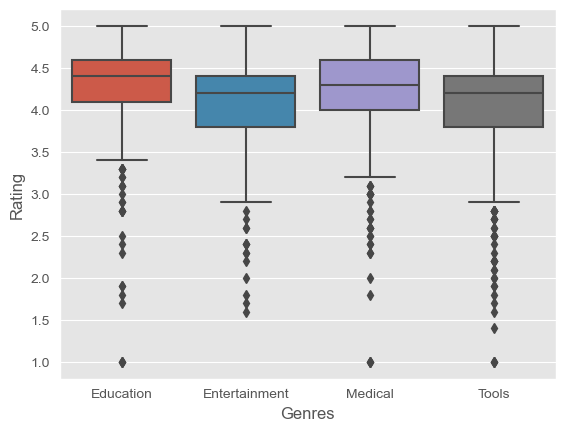

In [25]:
dat1['Genres'].value_counts()
c = ['Tools','Entertainment','Medical','Education']
dat2 = dat1[dat1['Genres'].isin(c)]
dat2['Genres'].value_counts()
sns.boxplot(x=dat2['Genres'], y= dat2.Rating)
plt.show()

In [26]:
dat1['Size_bucket'] = pd.qcut(dat1.Size, q= [0,0.2,0.4,0.6,0.8,1], labels= ['VL','L','M','H','VH'])
dat1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8615,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,VL
8616,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,VH
8617,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,VL
8618,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,M


In [27]:
pd.pivot_table(data= dat1, index= 'Content Rating', columns= 'Size_bucket', values= 'Rating')


Size_bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215784,4.170799,4.187302
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.143310,4.198131,4.246154


In [28]:
pd.pivot_table(data= dat1, index= 'Content Rating', columns= 'Size_bucket', values= 'Rating', aggfunc= np.median)

Size_bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [29]:
pd.pivot_table(data= dat1, index= 'Content Rating', columns= 'Size_bucket', values= 'Rating', aggfunc= lambda x : np.quantile(x, 0.2))

Size_bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


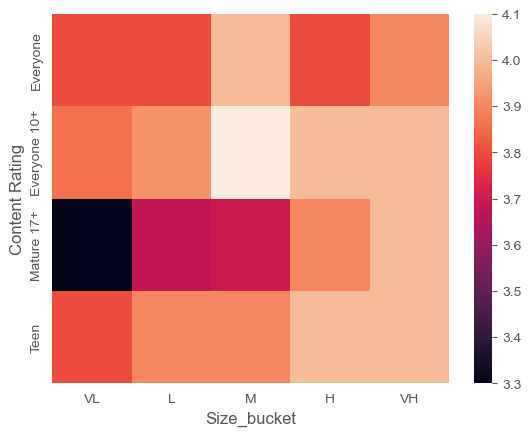

In [30]:
res = pd.pivot_table(data= dat1, index= 'Content Rating', columns= 'Size_bucket', values= 'Rating', aggfunc= lambda x : np.quantile(x, 0.2))
sns.heatmap(res)
plt.show()

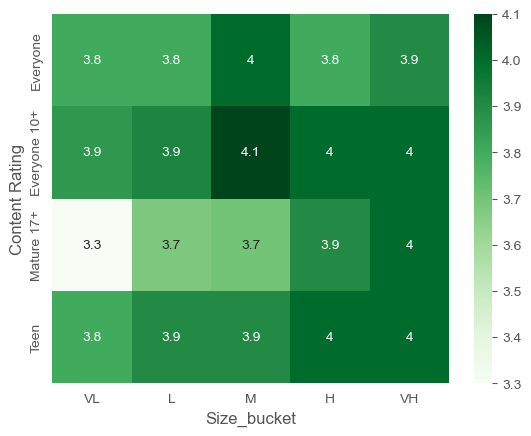

In [31]:
sns.heatmap(res, cmap= 'Greens', annot= True)
plt.show()

In [32]:
dat1.dtypes
dat1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [33]:
dat1['Updated_month'] = pd.to_datetime(dat1['Last Updated']).dt.month
dat1['Updated_month']

0       1
1       1
2       8
3       6
4       6
       ..
8615    6
8616    7
8617    7
8618    1
8619    7
Name: Updated_month, Length: 8620, dtype: int64

In [34]:
dat1.groupby(['Updated_month'])['Rating'].mean()

Updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

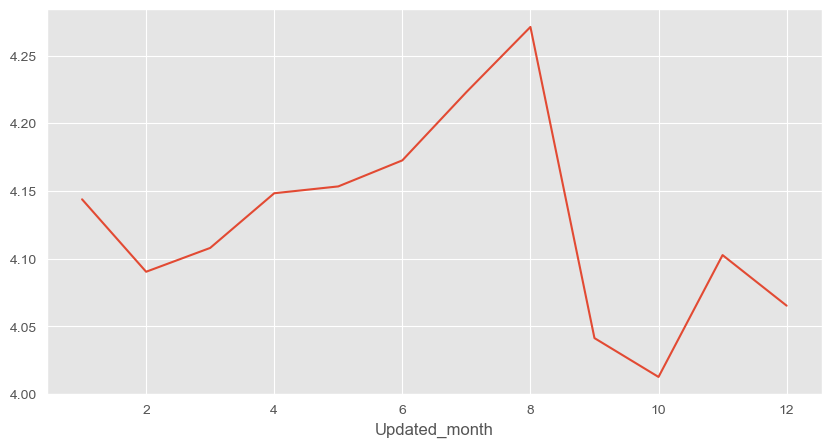

In [35]:
plt.figure(figsize=[10,5])
dat1.groupby(['Updated_month'])['Rating'].mean().plot()
plt.show()

In [36]:
pd.pivot_table(data= dat1, values= "Installs", index= 'Updated_month', columns='Content Rating', aggfunc= sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_month,,,,
1,925387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1861067800,118173500,50140100,202689600
6,2427170505,317727100,145257200,415716600
7,7771109680,456556000,419491910,1943556800
8,5930943320,215821000,312981700,1257855650
9,260340410,24931100,2201010,22483100


<AxesSubplot:xlabel='Updated_month'>

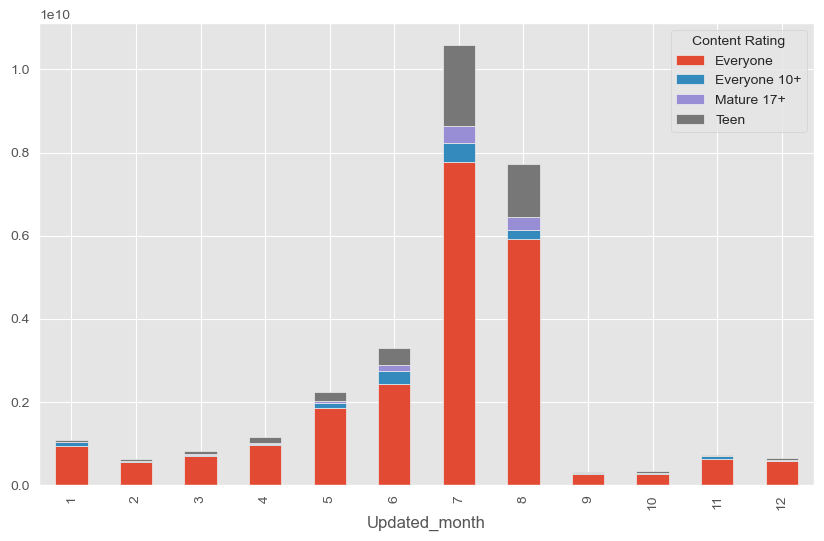

In [37]:
monthly = pd.pivot_table(data= dat1, values= "Installs", index= 'Updated_month', columns='Content Rating', aggfunc= sum)
monthly.plot(kind='bar', stacked='True', figsize=[10,6])

<AxesSubplot:xlabel='Updated_month'>

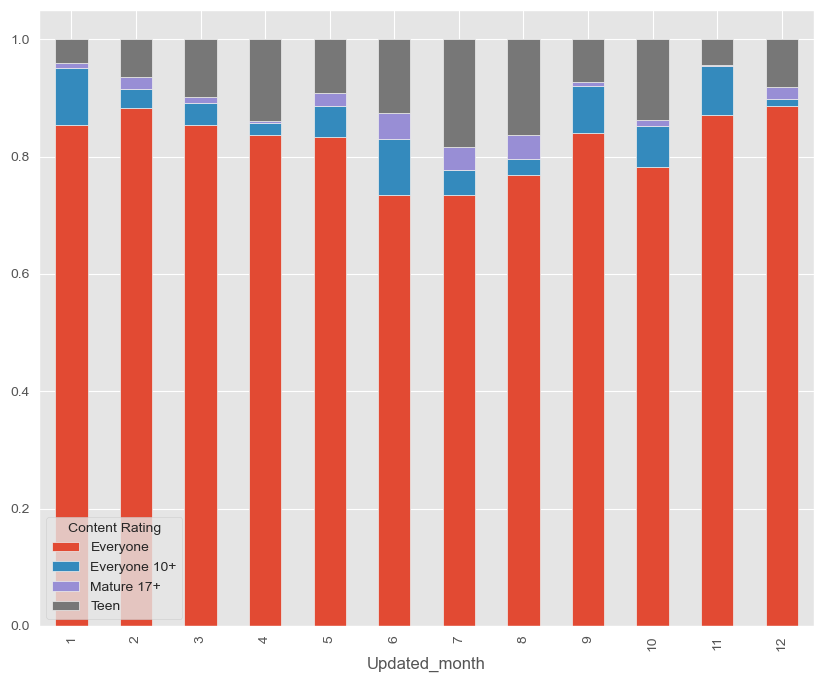

In [38]:
monthly_perc = monthly[['Everyone','Everyone 10+',	'Mature 17+','Teen']].apply(lambda x: x/x.sum(), axis=1)
monthly_perc.plot(kind='bar', stacked= 'True', figsize= [10,8])

In [39]:
res1 = dat1.groupby(['Updated_month'])[['Rating']].mean()
res1.reset_index(inplace=True)
res1

,Updated_month,Rating
0,1,4.143842
1,2,4.090385
2,3,4.107963
3,4,4.148326
4,5,4.153375
5,6,4.172590
6,7,4.222968
7,8,4.271086
8,9,4.041406
9,10,4.012739


In [40]:
import plotly.express as px
fig = px.line(res1, x = "Updated_month", y= 'Rating', title= "Monthly average Rating")
fig.show()